# ЦПТ своими руками

Необходимо выбрать некоторое распределение и проверить ЦПТ.

Выберем в качестве распределения Гамма-распределение:
$$ f(x) = 
 \begin{cases}
x^{(a-1)}\frac{e^{\frac{-x}{\theta}}}{\theta^{a}Г(a)}, x > 0\\
0, x < 0
\end{cases}$$
Мат. ожидание и дисперсия:
$$ E[X] = k\theta $$
$$ D[X] = k\theta^2 $$

с параметрами $$ a = 5, \theta = 1 $$
(документация на оф. сайте scipy)
<br><a href='https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5'>Ссылка на Вики</a>

In [6]:
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
a = 5
theta = 1 # выбрали параметры распределения
x = np.linspace(gamma.ppf(0.01,a),gamma.ppf(0.99, a), 100)

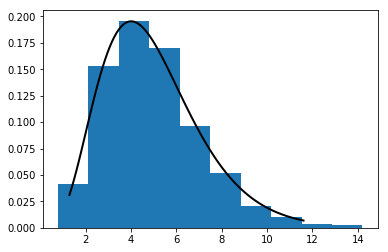

In [3]:
fig, ax = plt.subplots(1, 1)
r = gamma.rvs(a, size=1000) # генерируем выборку из 1000 значений
rv = gamma(a) # генерируем само распределение с парметром a (theta по дефолту 1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf') # функция распределения
ax.hist(r,density=True, histtype='stepfilled') # выборка на основе распределения
plt.show()

Ожидаемо графики накладываются друг на друга.
Далее реализуем функцию, которая будет строить график по заданному объему выборки

In [24]:
from scipy.stats import norm
import matplotlib.mlab as mlab


VARIENCE = a  * (theta **2) # ожидаемая дисперсия
MU = a * theta # ожидаемое мат. ожидание
def plot_graph(n):
    
    # сгенерируем n выборок размером 1000
    values = [] # здесь будем хранить значения выборочных средних
    for i in range(1000):
        r = gamma.rvs(a,size=n)
        summ = 0
        for el in r:
            summ += el
        values.append(summ/n)
    
    fig, ax = plt.subplots(1, 1)
    
    sigma = np.sqrt(VARIENCE/n) # конкретная сигма нормального распределения для нашего n
    x = np.linspace(MU - 3*sigma, MU + 3*sigma, 100) # оси абцисс строится по правилу 3-сигм
    ax.plot(x,norm.pdf(x, MU, sigma),label='ideal') # идеальное распределение
    ax.hist(values,density=True,bins=50,label='real') # выборочные средние
    plt.xlabel('values')
    plt.ylabel('Something close to probability')
    plt.title('n = '+str(n)+' case')
    ax.legend()
    plt.show()

## n = 3
После того, как все подготовлено, будем строить графики для отдельных случаев. Начнем с случая, когда n = 3

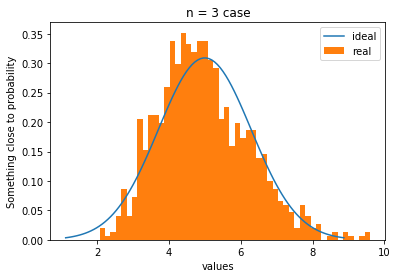

In [25]:
plot_graph(3)


## n = 10

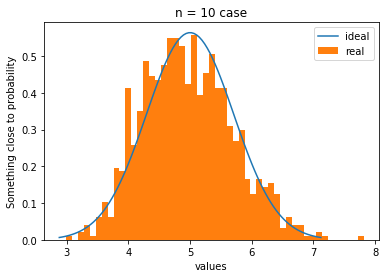

In [26]:
plot_graph(10)

## n = 50

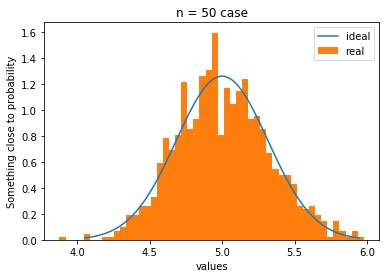

In [28]:
plot_graph(50)

## n = 100


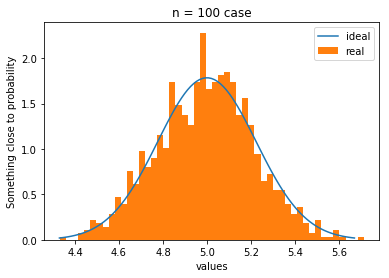

In [34]:
plot_graph(100)

### Вывод

Заметим, что с ростом n увеличивается качество аппроксимации. В среднем при n = 100 столбики меньше отклоняются от графика, чем при случае n = 3. Однако также заметим, что и при n = 3 аппроксимация получается довольно неплохой. 
В течение работы мы проверили, что ЦПТ выполняется тем лучшем, чем больше объемы выборки.